In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose as sm
import statsmodels.api as sa

In [84]:
data = pd.read_excel("/Users/neseuygun/Desktop/data/tourism_income.xlsx")
data.head()

,Tarih,Gelir
0,2003-Q1,402.000000
1,2003-Q2,759.000000
2,2003-Q3,2360.000000
3,2003-Q4,911.666667
4,2004-Q1,578.333333


In [85]:
data.dtypes

Tarih     object
Gelir    float64
dtype: object

In [86]:
data["Tarih"] = pd.date_range("2003", periods=len(data["Tarih"]), freq="Q")

In [87]:
data

,Tarih,Gelir
0,2003-03-31,402.000000
1,2003-06-30,759.000000
2,2003-09-30,2360.000000
3,2003-12-31,911.666667
4,2004-03-31,578.333333
...,...,...
77,2022-06-30,3226.333333
78,2022-09-30,5228.666667
79,2022-12-31,3370.000000
80,2023-03-31,2536.000000


In [88]:
data.dtypes

Tarih    datetime64[ns]
Gelir           float64
dtype: object

In [89]:
data.set_index("Tarih", inplace=True)

In [9]:
data.head()

,Gelir
Tarih,
2003-03-31,402.000000
2003-06-30,759.000000
2003-09-30,2360.000000
2003-12-31,911.666667
2004-03-31,578.333333


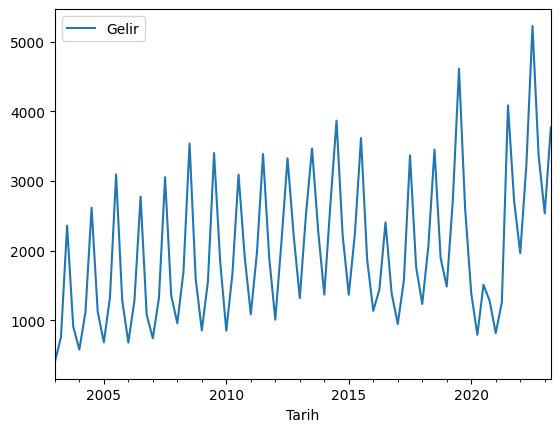

In [90]:
data.plot()
#plt.xticks(data.index, data.index.astype("str"), rotation=90)
plt.show()

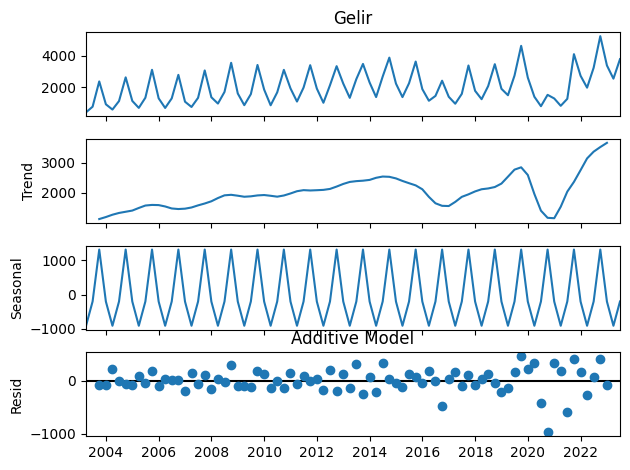

In [91]:
# Additive seasonal decomposition
additive_decomposition = sm(data["Gelir"], model="add", period=4)
additive_decomposition.plot()
plt.title("Additive Model")
plt.show()

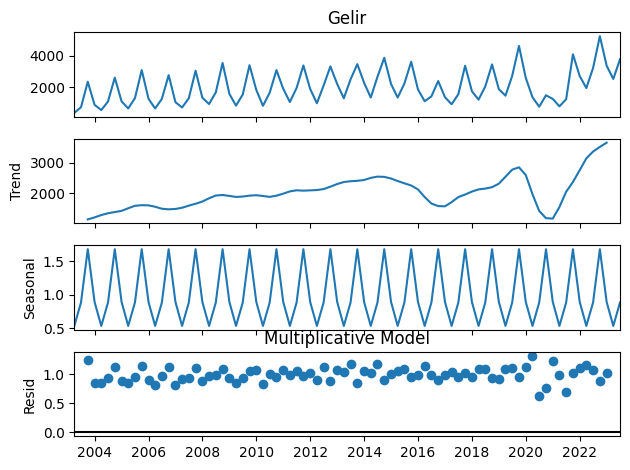

In [92]:
# Multiply seasonal decomposition
multiplicative_decomposition = sm(data["Gelir"], model="mul", period=4)
multiplicative_decomposition.plot()
plt.title("Multiplicative Model")
plt.show()

In [93]:
#Comparison of the standard deviation of two models
print(np.std(additive_decomposition.resid))
print(np.std(multiplicative_decomposition.resid))

220.45537653658045
0.12180914356727689


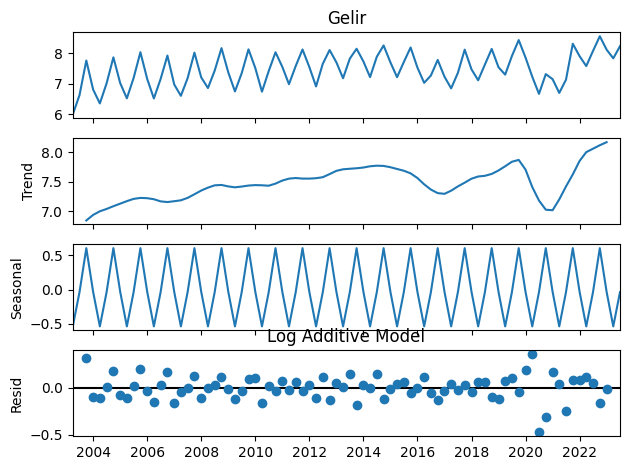

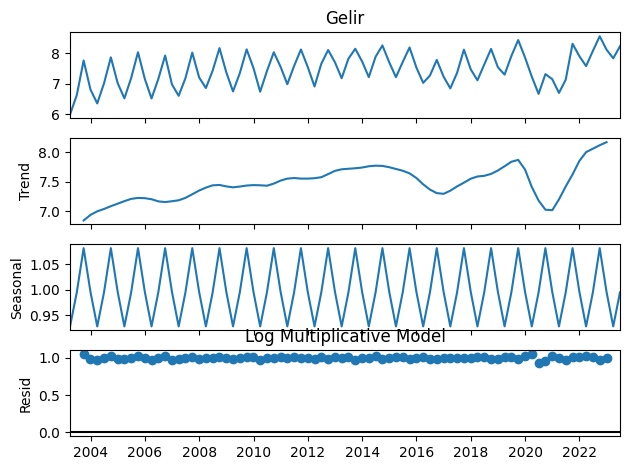

In [94]:
#Lets see logarithmic transformation of both model
log_additive = sm(np.log(data["Gelir"]), model="add", period=4)
log_additive.plot()
plt.title("Log Additive Model")
plt.show()

log_multiplicative = sm(np.log(data["Gelir"]), model="mul", period=4)
log_multiplicative.plot()
plt.title("Log Multiplicative Model")
plt.show()

In [95]:
# When we look at the above pictures, we can easily see log transformation in multiplicative model has lowest variance. 
# So we can say its predict error will be less where we compare the other models.

print("Trend Values")
print(additive_decomposition.trend)
print("Seasonal Values")
print(additive_decomposition.seasonal)
print("Residual Values")
print(additive_decomposition.resid)

Trend Values
Tarih
2003-03-31            NaN
2003-06-30            NaN
2003-09-30    1130.208333
2003-12-31    1196.958333
2004-03-31    1273.875000
                 ...     
2022-06-30    3365.916667
2022-09-30    3518.875000
2022-12-31    3658.333333
2023-03-31            NaN
2023-06-30            NaN
Name: trend, Length: 82, dtype: float64
Seasonal Values
Tarih
2003-03-31    -907.551809
2003-06-30    -200.580318
2003-09-30    1310.938980
2003-12-31    -202.806853
2004-03-31    -907.551809
                 ...     
2022-06-30    -200.580318
2022-09-30    1310.938980
2022-12-31    -202.806853
2023-03-31    -907.551809
2023-06-30    -200.580318
Name: seasonal, Length: 82, dtype: float64
Residual Values
Tarih
2003-03-31           NaN
2003-06-30           NaN
2003-09-30    -81.147314
2003-12-31    -82.484814
2004-03-31    212.010143
                 ...    
2022-06-30     60.996985
2022-09-30    398.852686
2022-12-31    -85.526480
2023-03-31           NaN
2023-06-30           NaN
Name: r

In [96]:
# Now we will continue with the multiplicative model for prediction
decomposition = sm(data["Gelir"], model="mul", period=4)

data_mul = pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, 
                      decomposition.observed/decomposition.seasonal], axis=1)

data_mul.columns = ["Actual", "Trend", "Seasonal", "Seasonal_Error"]

In [97]:
data_mul

,Actual,Trend,Seasonal,Seasonal_Error
Tarih,,,,
2003-03-31,402.000000,NaN,0.535736,750.369440
2003-06-30,759.000000,NaN,0.885841,856.813160
2003-09-30,2360.000000,1130.208333,1.683885,1401.520947
2003-12-31,911.666667,1196.958333,0.894538,1019.147794
2004-03-31,578.333333,1273.875000,0.535736,1079.511591
...,...,...,...,...
2022-06-30,3226.333333,3365.916667,0.885841,3642.114440
2022-09-30,5228.666667,3518.875000,1.683885,3105.121127
2022-12-31,3370.000000,3658.333333,0.894538,3767.306835


In [98]:
indeks = np.arange(1, len(data.index)+1)
len(indeks)


82

In [99]:
X = sa.add_constant(indeks)
model = sa.OLS(data_mul["Seasonal_Error"],X)
result = model.fit()
#print(result.summary())

In [100]:
start_date = data_mul.index[-1] + pd.DateOffset(months=3)
start_date

Timestamp('2023-09-30 00:00:00')

In [101]:
y = pd.date_range(start_date, periods=4, freq="Q")
y

DatetimeIndex(['2023-09-30', '2023-12-31', '2024-03-31', '2024-06-30'], dtype='datetime64[ns]', freq='Q-DEC')

In [102]:
new_rows = pd.DataFrame(index=y)
data_mul = pd.concat([data_mul, new_rows])
data_mul

,Actual,Trend,Seasonal,Seasonal_Error
2003-03-31,402.000000,NaN,0.535736,750.369440
2003-06-30,759.000000,NaN,0.885841,856.813160
2003-09-30,2360.000000,1130.208333,1.683885,1401.520947
2003-12-31,911.666667,1196.958333,0.894538,1019.147794
2004-03-31,578.333333,1273.875000,0.535736,1079.511591
...,...,...,...,...
2023-06-30,3771.000000,NaN,0.885841,4256.972896
2023-09-30,NaN,NaN,NaN,NaN
2023-12-31,NaN,NaN,NaN,NaN
2024-03-31,NaN,NaN,NaN,NaN


In [104]:
data_mul["Seasonal"] = data_mul.index.month.map({3:0.535736, 6:0.885841, 9:1.683885, 12:0.894538})
data_mul

,Actual,Trend,Seasonal,Seasonal_Error
2003-03-31,402.000000,NaN,0.535736,750.369440
2003-06-30,759.000000,NaN,0.885841,856.813160
2003-09-30,2360.000000,1130.208333,1.683885,1401.520947
2003-12-31,911.666667,1196.958333,0.894538,1019.147794
2004-03-31,578.333333,1273.875000,0.535736,1079.511591
...,...,...,...,...
2023-06-30,3771.000000,NaN,0.885841,4256.972896
2023-09-30,NaN,NaN,1.683885,NaN
2023-12-31,NaN,NaN,0.894538,NaN
2024-03-31,NaN,NaN,0.535736,NaN


In [110]:
new_index = np.arange(1, len(data_mul.index)+1)
new_index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86])

In [114]:
reg_model = result.predict(sa.add_constant(new_index))

In [115]:
data_mul["Predict"] = data_mul["Seasonal"]*reg_model

In [116]:
data_mul

,Actual,Trend,Seasonal,Seasonal_Error,Predict
2003-03-31,402.000000,NaN,0.535736,750.369440,661.617036
2003-06-30,759.000000,NaN,0.885841,856.813160,1111.829535
2003-09-30,2360.000000,1130.208333,1.683885,1401.520947,2147.383248
2003-12-31,911.666667,1196.958333,0.894538,1019.147794,1158.783385
2004-03-31,578.333333,1273.875000,0.535736,1079.511591,704.783296
...,...,...,...,...,...
2023-06-30,3771.000000,NaN,0.885841,4256.972896,2539.340225
2023-09-30,NaN,NaN,1.683885,NaN,4860.921952
2023-12-31,NaN,NaN,0.894538,NaN,2600.309074
2024-03-31,NaN,NaN,0.535736,NaN,1568.108506


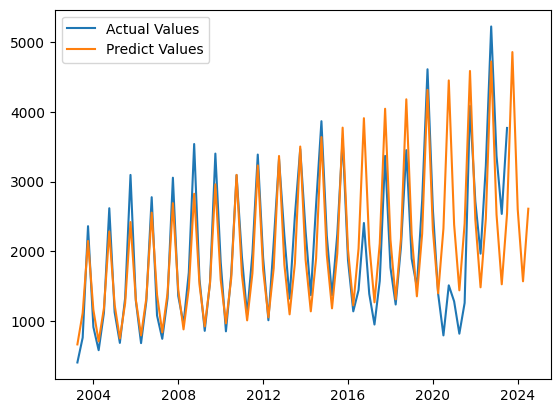

In [117]:
plt.plot(data_mul["Actual"], label = "Actual Values")
plt.plot(data_mul["Predict"], label = "Predict Values")
plt.legend()
plt.show()